In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset into python environment 

In [3]:
data=pd.read_csv(r"C:\Users\yedhu\Downloads\titanic_dataset .csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Do all the necessary pre-processing steps 

In [5]:
#Making Passenger Id as index
data.set_index('PassengerId', inplace=True)

In [6]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.shape

(891, 11)

In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# Checking for missing values

In [10]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [14]:
Age_median = data['Age'].median()
Cabin_mode = data['Cabin'].mode()[2]
Embarked_mode = data['Embarked'].mode()

In [15]:
#Filling in all the missing values with median and mode
data.fillna({
    'Age': data['Age'].mean(),               
    'Cabin': 'Unknown',                    
    'Embarked': data['Embarked'].mode()[0]  
}, inplace=True)

In [16]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# checking for Outliers

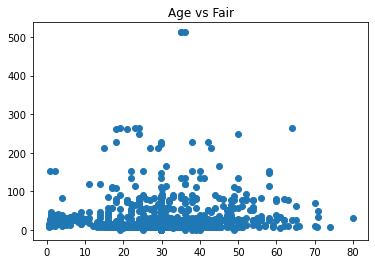

<Figure size 720x576 with 0 Axes>

In [17]:
#Scatter Plot for Age vs Fair
plt.scatter(data['Age'],data['Fare'])
plt.title('Age vs Fair')
plt.figure(figsize=(10, 8))
plt.show()

In [18]:
Age_above70 = data[data['Age']>70].index
Age_above70

Int64Index([97, 117, 494, 631, 852], dtype='int64', name='PassengerId')

In [19]:
Fare_above300 = data[data['Fare']>300].index
Fare_above300

Int64Index([259, 680, 738], dtype='int64', name='PassengerId')

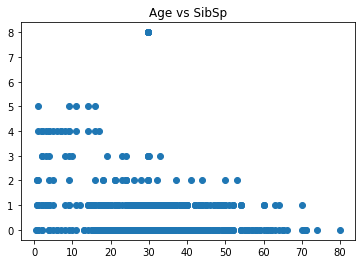

<Figure size 720x576 with 0 Axes>

In [20]:
#Scatter Plot for Age vs SibSp
plt.scatter(data['Age'],data['SibSp'])
plt.title('Age vs SibSp')
plt.figure(figsize=(10, 8))
plt.show()

In [21]:
SibSp_above7 = data[data['SibSp']>7].index
SibSp_above7

Int64Index([160, 181, 202, 325, 793, 847, 864], dtype='int64', name='PassengerId')

In [22]:
#Removing the outliers
data.drop([97, 117, 494, 631, 852,259, 680, 738,160, 181, 202, 325, 793, 847, 864])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S


In [23]:
data.shape

(891, 11)

# Remove irrelevant columns

In [24]:
columns_to_drop = ['Name', 'Ticket', 'Cabin']
data.drop(columns=columns_to_drop, inplace=True)

# One-hot encoding using pandas

In [25]:
data1 = pd.get_dummies(data, columns=['Sex', 'Embarked'])

In [26]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [27]:
data1.shape

(891, 11)

# Correlation Heatmap

In [28]:
corr_matrix = data1.corr()

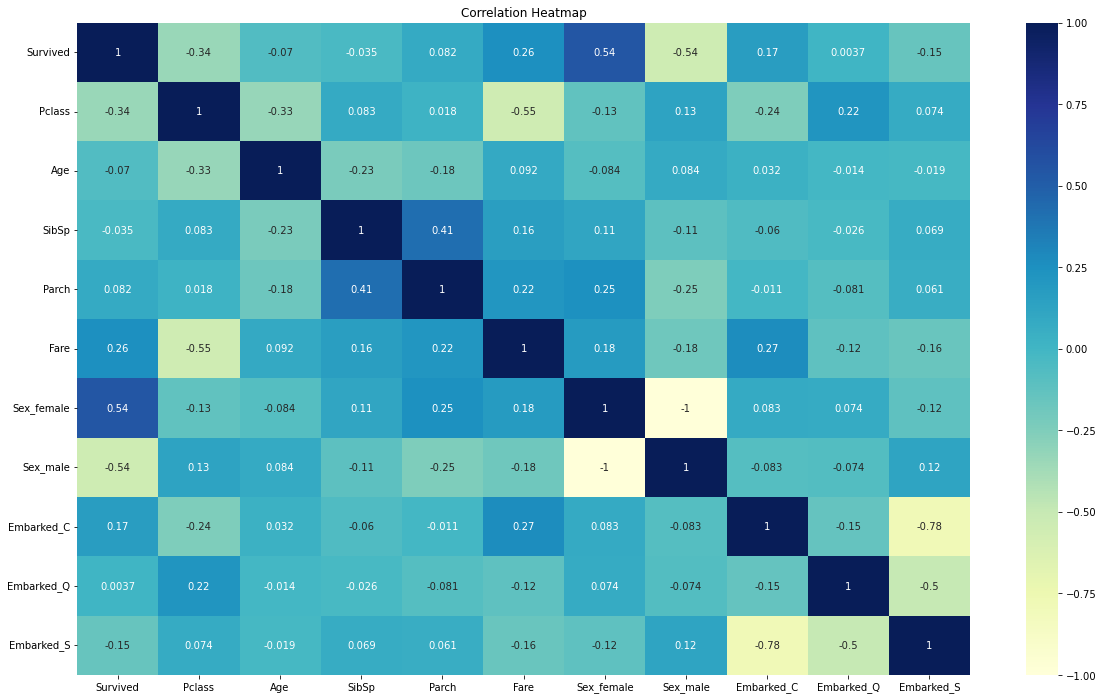

In [29]:
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix,annot=True,cmap = 'YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
x = data1.drop('Survived', axis=1)
y = data1['Survived']

# Min Max Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
min_max = MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)

In [33]:
type(x)

numpy.ndarray

In [34]:
x=pd.DataFrame(x)

In [35]:
x.describe()

,0,1,2,3,4,5,6,7,8,9
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.367921,0.065376,0.063599,0.062858,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.418036,0.163383,0.137843,0.134343,0.096995,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.367921,0.000000,0.000000,0.028213,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.434531,0.125000,0.000000,0.060508,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
#splitting the data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# 3. Create kNN and SVM models 

# SVM Model

In [37]:
from sklearn.svm import SVC
svmclf = SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [38]:
y_pred = svmclf.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 0.7847533632286996


In [40]:
print(confusion_matrix(y_test,y_pred))

[[112  22]
 [ 26  63]]


# KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [43]:
knn_pred = knn.predict(x_test)

In [44]:
accuracy = accuracy_score(y_test, knn_pred)

In [45]:
accuracy

0.8071748878923767

# 4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models

In [46]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# Defining the number of folds for cross-validation
n_splits = 5

In [48]:
# Initializing cross-validation techniques
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

In [49]:
# Initialize lists to store accuracy scores
kfold_scores = []
stratified_kfold_scores = []

In [ ]:
# Performing k-fold cross-validation
for train_index, test_index in kfold.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
 knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(X_test)
    kfold_scores.append(accuracy_score(y_test, knn_pred))

In [ ]:
# Performing stratified k-fold cross-validation
for train_index, test_index in stratified_kfold.split(x, y):
    x_train, x_test = x[train_index], [test_ixndex]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
 knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)
    stratified_kfold_scores.append(accuracy_score(y_test, knn_pred))

In [ ]:
# Calculating average accuracy scores
avg_kfold_accuracy = sum(kfold_scores) / n_splits
avg_stratified_kfold_accuracy = sum(stratified_kfold_scores) / n_splits

In [ ]:
avg_kfold_accuracy

In [ ]:
avg_stratified_kfold_accuracy